In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

from modules.utils import load_cifar10
from modules.train import train
from modules.cnn_with_spectral_pooling import CNN_Spectral_Pool

% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
xtrain, ytrain, xtest, ytest = load_cifar10(1, get_test_data=True, channels_last=True)

file already downloaded..
getting batch 1


In [3]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((10000, 32, 32, 3), (10000,), (10000, 32, 32, 3), (10000,))

In [6]:
# # take a small batch for testing architecture
sample_size = 32
sampleind = np.random.choice(np.arange(xtrain.shape[0]),
                             size=sample_size, replace=False)
xtrain_sample = xtrain[sampleind]
ytrain_sample = ytrain[sampleind]
assert len(np.unique(ytrain_sample)) == 10
xtrain_sample.shape

(32, 32, 32, 3)

## test build graph:

In [37]:
cnn = CNN_Spectral_Pool(M=3,verbose=True,learning_rate=1e-4)
tf.reset_default_graph()
cnn.train(xtrain_sample, ytrain_sample, xtrain_sample, ytrain_sample,
          batch_size=32, epochs=200)

Building tf graph...
Adding conv layer 1 | Input size: 32 | Input channels: 3 | #filters: 128 | filter size: 3
Adding spectral pool layer 1 | Input size: 32 | filter size: (27,27) | Freq Dropout: 22
Adding conv layer 2 | Input size: 27 | Input channels: 128 | #filters: 160 | filter size: 3
Adding spectral pool layer 2 | Input size: 27 | filter size: (21,21) | Freq Dropout: 16
Adding conv layer 3 | Input size: 21 | Input channels: 160 | #filters: 192 | filter size: 3
Adding spectral pool layer 3 | Input size: 21 | filter size: (17,17) | Freq Dropout: 18
Adding conv layer 4 | Input size: 17 | Input channels: 192 | #filters: 192 | filter size: 1
Adding conv layer 5 | Input size: 17 | Input channels: 192 | #filters: 10 | filter size: 1
Adding final softmax layer using global averaging
number of batches for training: 1
training epoch 1 
32/32 loss: 3.199604034423828 | training accuracy: 12.500% | validation accuracy : 15.625%

	Best validation accuracy! iteration:1 accuracy: 15.625%

traini

32/32 loss: 2.176835060119629 | training accuracy: 37.500% | validation accuracy : 37.500%
training epoch 65 
32/32 loss: 2.170301914215088 | training accuracy: 37.500% | validation accuracy : 40.625%
training epoch 66 
32/32 loss: 2.163956642150879 | training accuracy: 40.625% | validation accuracy : 43.750%

	Best validation accuracy! iteration:66 accuracy: 43.75%

training epoch 67 
32/32 loss: 2.157784938812256 | training accuracy: 43.750% | validation accuracy : 43.750%
training epoch 68 
32/32 loss: 2.1517796516418457 | training accuracy: 43.750% | validation accuracy : 43.750%
training epoch 69 
32/32 loss: 2.1459522247314453 | training accuracy: 43.750% | validation accuracy : 43.750%
training epoch 70 
32/32 loss: 2.1403133869171143 | training accuracy: 43.750% | validation accuracy : 43.750%
training epoch 71 
32/32 loss: 2.134875774383545 | training accuracy: 43.750% | validation accuracy : 43.750%
training epoch 72 
32/32 loss: 2.1296963691711426 | training accuracy: 43.750

32/32 loss: 1.9155194759368896 | training accuracy: 56.250% | validation accuracy : 62.500%

	Best validation accuracy! iteration:135 accuracy: 62.5%

training epoch 136 
32/32 loss: 1.9137327671051025 | training accuracy: 59.375% | validation accuracy : 62.500%
training epoch 137 
32/32 loss: 1.9127788543701172 | training accuracy: 62.500% | validation accuracy : 62.500%
training epoch 138 
32/32 loss: 1.9129631519317627 | training accuracy: 62.500% | validation accuracy : 62.500%
training epoch 139 
32/32 loss: 1.9144874811172485 | training accuracy: 62.500% | validation accuracy : 59.375%
training epoch 140 
	Learning rate reduced to 1.0000e-06 at epoch 140
32/32 loss: 1.9150521755218506 | training accuracy: 62.500% | validation accuracy : 62.500%
training epoch 141 
32/32 loss: 1.9101402759552002 | training accuracy: 62.500% | validation accuracy : 62.500%
training epoch 142 
32/32 loss: 1.9000859260559082 | training accuracy: 62.500% | validation accuracy : 59.375%
training epoch 

__Note:__ in the above output, train acc is not same as validation acc even though they are the same because of dropout applied in train and not in validation

In [22]:
cnn.calc_test_accuracy(xtrain_sample, ytrain_sample)

Building tf graph...
Adding conv layer 1 | Input size: 32 | Input channels: 3 | #filters: 128 | filter size: 3
Adding spectral pool layer 1 | Input size: 32 | filter size: (27,27) | Freq Dropout: 14
Adding conv layer 2 | Input size: 27 | Input channels: 128 | #filters: 160 | filter size: 3
Adding spectral pool layer 2 | Input size: 27 | filter size: (21,21) | Freq Dropout: 12
Adding conv layer 3 | Input size: 21 | Input channels: 160 | #filters: 192 | filter size: 3
Adding spectral pool layer 3 | Input size: 21 | filter size: (17,17) | Freq Dropout: 10
Adding conv layer 4 | Input size: 17 | Input channels: 192 | #filters: 192 | filter size: 1
Adding conv layer 5 | Input size: 17 | Input channels: 192 | #filters: 10 | filter size: 1
Adding final softmax layer using global averaging
Loading pre-trained model
INFO:tensorflow:Restoring parameters from model/test
Test accuracy: 43.750


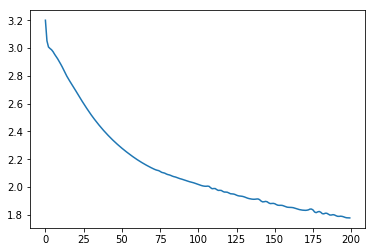

In [39]:
plt.plot(cnn.loss_vals)

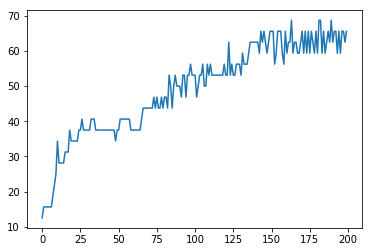

In [40]:
plt.plot(cnn.train_accuracy)

In [27]:
# show the graph
from modules.utils import show_graph 
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('model/test.meta')
    graph = tf.get_default_graph()
    show_graph(graph)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [18]:
c

2